# SOK-1006 Mikro
## Seminar 1
### Oppgave 3

In [1]:
# importer pakkene som vi trenger
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [2]:
# definer symbolene som vi kommer til å bruke
x,a,b,A,B,k,r,m,s,p=sp.symbols('x a b A B k r m s p', positive=True)

In [3]:
# Etterspørsel i likning (1)

def demand_1(p, a, b):
    return a - b*p

In [4]:
# Regn ut den deriverte dxD/dp

diff_xd1=sp.diff(demand_1(p,a,b),p)
diff_xd1




-b

In [5]:
# Elastisitetsformel El_d=(dxD/dp)*p/x

elast_d1=sp.lambdify(
    (p, a, b), 
    diff_xd1*p/demand_1(p,a,b)
)

elast_d1(p,a,b)


-b*p/(a - b*p)

$El_{d(1)}= \frac{-bp}{a-bp}$

In [6]:
# Etterspørsel i likning (3)

def demand_3(p, k, r):
    return k*p**(-r)

In [7]:
# Regn ut den deriverte dxD/dp

diff_xd3=sp.diff(demand_3(p,k,r),p)
diff_xd3

-k*r/(p*p**r)

In [8]:
# Elastisitet

elast_d3=(diff_xd3)*p/demand_3(p,k,r)
elast_d3

-r

$El_{d(3)}=-r$

Legg merke til at etterspørselselastisiteten til (3) er et konstant tall!
La oss tegne etterspørselselastisitetene.

In [9]:
elast_xd3=sp.lambdify(
    (p,k, r), 
    elast_d3
)

elast_xd3(p,k,r)

-r

Tegn eksempler for a= 10, b=2, r=.5

(-2.0, 0.0)

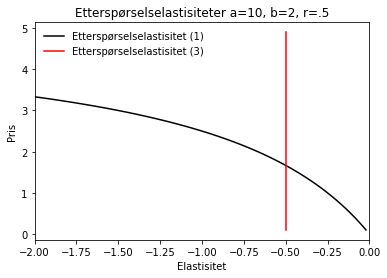

In [10]:
p_new = np.linspace(0.1,4.9,100)

# Etterspørselselastisitet (1) kan tegnes på vanlig vis ettersom dette er en funksjon som tar hver p verdi
# og tilordner det en elastisitet.

plt.plot(elast_d1(p_new,10,2), p_new,color='black',label='Etterspørselselastisitet (1)')

# Etterspørselselastisitet (3) er et konstant tall. Hver p (og vi har 100 i np.linspace) tilordnes samme elastistitet
# for å plotte vil matplotlib ha samme antall p verdier og etterspørselsverdier (selv om samme verdi (-r) dukker opp hver gang.
# np.full(p.shape, elast_xd3(p,0.5) tar seg av dette, 
# og passer på at numpy array p og det som kommer fra elast_xd3 har samme antall punkter.
plt.plot(np.full(p_new.shape, elast_xd3(p_new,1, 0.5)), p_new,color='red',label='Etterspørselselastisitet (3)')



#legend:
plt.legend(loc='upper left', frameon=False)

#axis lables
plt.ylabel('Pris')
plt.xlabel('Elastisitet')

plt.title('Etterspørselselastisiteter a=10, b=2, r=.5')

# tilpass aksene
#plt.ylim((0,4.9))
plt.xlim((-2,0))

Tegne slik at vi kan se hvordan elastisiteten endres når vi går langs etterspørselskurven.

[(0.0, 4.0)]

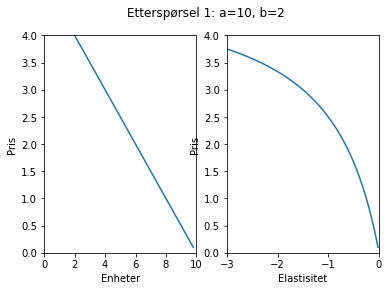

In [11]:
fig, (ax1,ax2)=plt.subplots(1,2)
fig.suptitle('Etterspørsel 1: a=10, b=2')
ax1.plot(demand_1(p_new, 10,2), p_new)
ax1.set(xlabel='Enheter',ylabel='Pris')
ax1.set(xlim=(0,10))
ax1.set (ylim=(0,4))
ax2.plot(elast_d1(p_new,10,2), p_new)
ax2.set(xlabel='Elastisitet',ylabel='Pris')
ax2.set( xlim=(-3,0))
ax2.set(ylim=(0,4))

Hvordan endres elastisiteten når a og b øker? Rød linje gir en økning i b, grønn linje gir en økning i a.

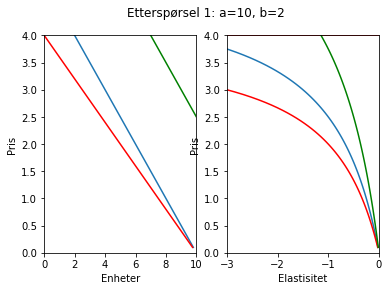

In [12]:
ax1.plot(demand_1(p_new, 10,2.5), p_new, color='red')
ax2.plot(elast_d1(p_new,10,2.5), p_new, color='red')
ax1.plot(demand_1(p_new, 15,2), p_new, color='green')
ax2.plot(elast_d1(p_new,15,2), p_new, color='green')
fig

Etterspørselen blir mer elastisk når b øker, og mindre elastisk når a øker.

Etterspørsel 3

[(-1.0, 0.0)]

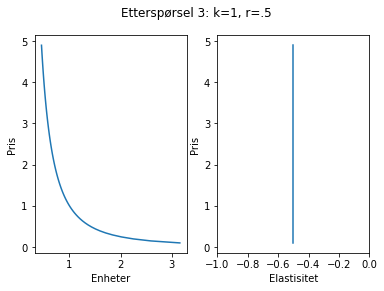

In [13]:
fig, (ax1,ax2)=plt.subplots(1,2)
fig.suptitle('Etterspørsel 3: k=1, r=.5')
ax1.plot(demand_3(p_new, 1,0.5), p_new)
ax1.set(xlabel='Enheter',ylabel='Pris')
ax2.plot(np.full(p_new.shape, elast_xd3(p_new,1,0.5)), p_new)
ax2.set(xlabel='Elastisitet',ylabel='Pris')
ax2.set( xlim=(-1,0))

### Tilbudselastisiteter

In [14]:
# tilbud (2)
def tilbud_2(p,A,B):
    return -A+B*p


In [15]:
diff_s2=sp.diff(tilbud_2(p,A,B),p)
diff_s2

B

In [16]:
elast_s2=sp.lambdify(
    (p, A, B), 
    diff_s2*p/tilbud_2(p,A,B)
)

elast_s2(p,A,B)

B*p/(-A + B*p)

$El_{s(2)}= \frac{Bp}{Bp-A}$

In [17]:
# tilbud (4)
def tilbud_4(p,m,s):
    return m*p**s
diff_s4=sp.diff(tilbud_4(p,m,s),p)

elast_s4=sp.lambdify(
    (p, m,s), 
    diff_s4*p/tilbud_4(p,m,s)
)

elast_s4(p,m,s)

s

$El_{s(4)}=s$

Tegn for A=.5, B=4, m=1, s=0.75

(0.0, 2.0)

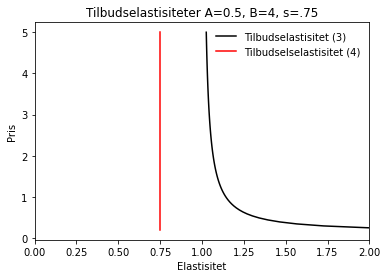

In [18]:
p_s = np.linspace(0.2,5,100)

plt.plot(elast_s2(p_s,.5,4),p_s, color='black',label='Tilbudselastisitet (3)')

# Etterspørselselastisitet (3) er et konstant tall. Hver p (og vi har 100 i np.linspace) tilordnes samme elastistitet
# for å plotte vil matplotlib ha samme antall p verdier og etterspørselsverdier (selv om samme verdi (-r) dukker opp hver gang.
# np.full(p.shape, elast_xd3(p,0.5) tar seg av dette, 
# og passer på at numpy array p og det som kommer fra elast_xd3 har samme antall punkter.
plt.plot(np.full(p_s.shape, elast_s4(p_s,1,0.75)),p_s, color='red',label='Tilbudselselastisitet (4)')



#legend:
plt.legend(loc='upper right', frameon=False)

#axis lables
plt.ylabel('Pris')
plt.xlabel('Elastisitet')

plt.title('Tilbudselastisiteter A=0.5, B=4, s=.75')

# tilpass aksene
#plt.ylim((0,5))
plt.xlim((0,2))

[(0.0, 3.0)]

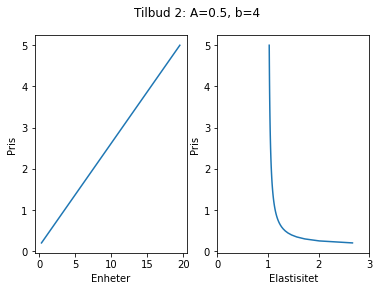

In [19]:
fig, (ax1,ax2)=plt.subplots(1,2)
fig.suptitle('Tilbud 2: A=0.5, b=4')
ax1.plot(tilbud_2(p_s, .5,4), p_s)
ax1.set(xlabel='Enheter',ylabel='Pris')
ax2.plot(elast_s2(p_s,.5,4), p_s)
ax2.set(xlabel='Elastisitet',ylabel='Pris')
ax2.set( xlim=(0,3))

Hvordan endres elastisiteten når A og B økes? Økning i A i rødt, økning i B i grønt.

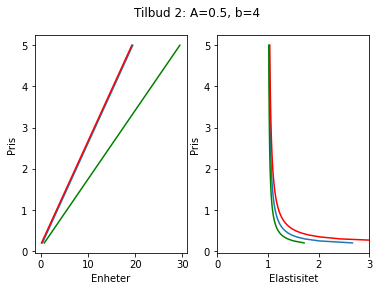

In [20]:
ax1.plot(tilbud_2(p_s, .7,4), p_s,color='red')
ax1.plot(tilbud_2(p_s, .5,6), p_s,color='green')
ax2.plot(elast_s2(p_s,.7,4), p_s,color='red')
ax2.plot(elast_s2(p_s,.5,6), p_s,color='green')
fig

En økning i A gjør tilbud mer elastisk. En økning i B gjør tilbud mindre elastisk.

[(0.0, 1.0)]

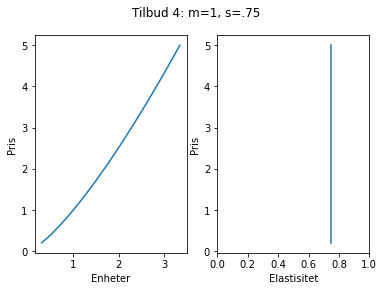

In [21]:
fig, (ax1,ax2)=plt.subplots(1,2)
fig.suptitle('Tilbud 4: m=1, s=.75')
ax1.plot(tilbud_4(p_s, 1,0.75), p_s)
ax1.set(xlabel='Enheter',ylabel='Pris')
ax2.plot(np.full(p_s.shape, elast_s4(p_s,1,0.75)), p_s)
ax2.set(xlabel='Elastisitet',ylabel='Pris')
ax2.set( xlim=(0,1))